<a href="https://colab.research.google.com/github/Akshaya1202/InsurancePredictor/blob/main/MIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

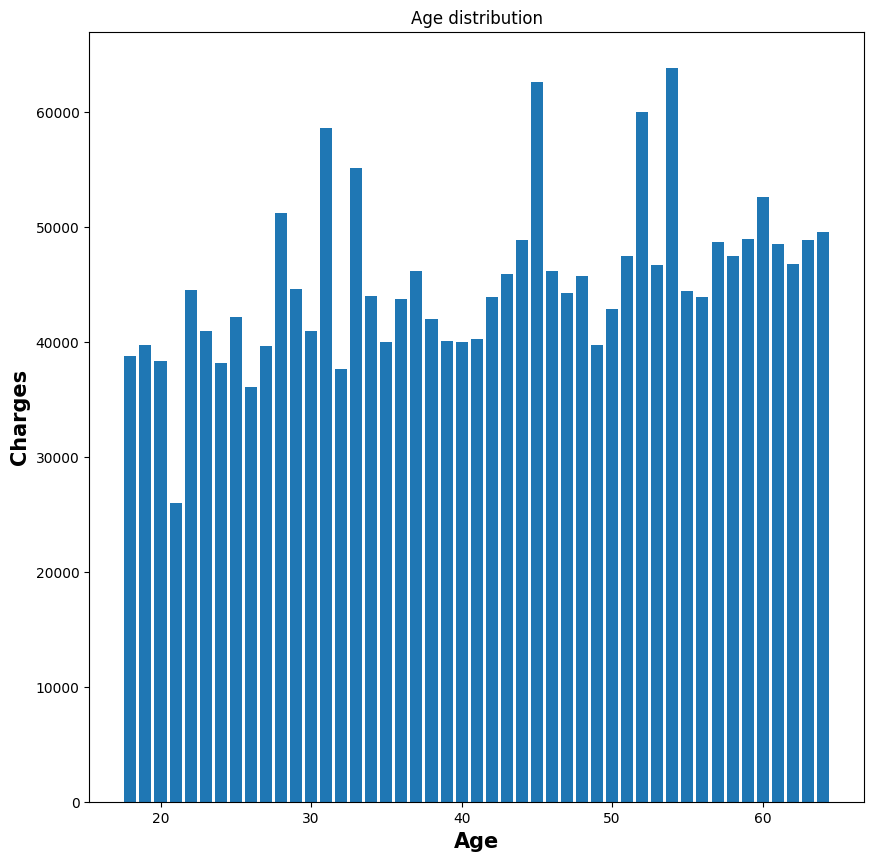

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Age distribution")
plt.bar(data['age'],data['charges'])
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Charges', fontweight ='bold', fontsize = 15)
plt.show()

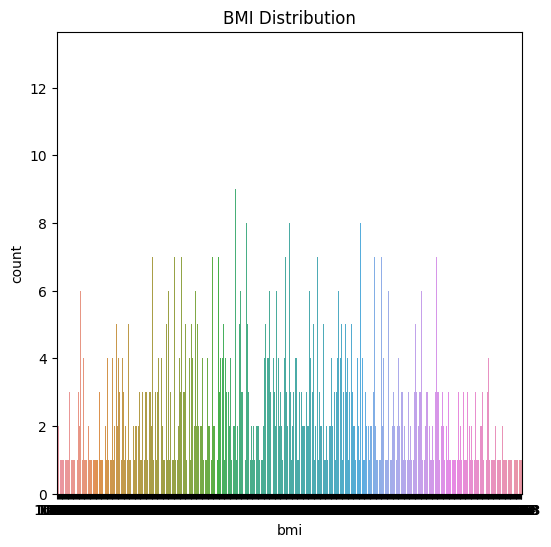

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='bmi',data=data)
plt.title('BMI Distribution')
plt.show()

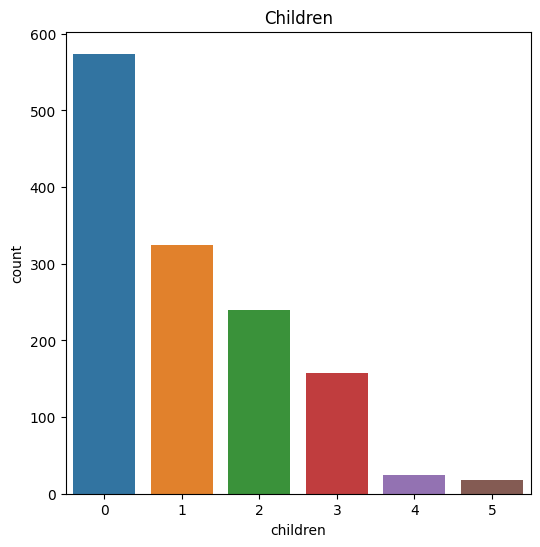

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [ ]:
#data preprocessing
data.replace({'sex': {'male':0, 'female':1}},inplace=True)
data.replace({'smoker': {'yes':0, 'no':1}},inplace=True)
data.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [ ]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [ ]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#Linear Regression Model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_pred = model.predict(X_train)
print(trai_npred)

[  478.49404197  9317.75369733 13193.79859142 ... 17327.55442479
  9600.51860822 13753.18970971]


In [ ]:
train_r2 = metrics.r2_score(Y_train, train_pred)
print(train_r2)

0.751505643411174


In [ ]:
print(model.score(X_test, Y_test))

0.7447273869684076


In [ ]:
test_pred = model.predict(X_test)

In [ ]:
test_r2 = metrics.r2_score(Y_test, test_pred)
print(test_r2)

0.7447273869684076


In [ ]:
#Predictive System
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
